# Exercise 1 

Calculate average numbers of goals per one match in each country league. Draw a plot visualising the results.

- prepare a new column with total goals 
- then group by country and aggregate total goals using mean aggregate function

In [1]:
import pandas as pd

In [4]:
url = 'https://github.com/alx2202/DataAnalysis/raw/main/Day10/matches.csv'
matches = pd.read_csv(url, parse_dates=['date'])
matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3
...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,FC St. Gallen,FC Thun,2015-09-22,2015/2016,1,0
25975,Switzerland,Switzerland Super League,FC Vaduz,FC Luzern,2015-09-23,2015/2016,1,2
25976,Switzerland,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2015-09-23,2015/2016,2,0
25977,Switzerland,Switzerland Super League,Lugano,FC Zürich,2015-09-22,2015/2016,0,0


In [6]:
matches['total_goals'] = matches.home_team_goal + matches.away_team_goal
matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,total_goals
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1,2
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0,5
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3,4
...,...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,FC St. Gallen,FC Thun,2015-09-22,2015/2016,1,0,1
25975,Switzerland,Switzerland Super League,FC Vaduz,FC Luzern,2015-09-23,2015/2016,1,2,3
25976,Switzerland,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2015-09-23,2015/2016,2,0,2
25977,Switzerland,Switzerland Super League,Lugano,FC Zürich,2015-09-22,2015/2016,0,0,0


In [7]:
mean_goals = matches.groupby('country').agg({
    'total_goals': 'mean'
})
mean_goals

,total_goals
country,
Belgium,2.801505
England,2.710526
France,2.443092
Germany,2.901552
Italy,2.616838
Netherlands,3.080882
Poland,2.425000
Portugal,2.534600
Scotland,2.633772


In [8]:
mean_goals.sort_values('total_goals')  # by default sorted in ascending order

,total_goals
country,
Poland,2.425000
France,2.443092
Portugal,2.534600
Italy,2.616838
Scotland,2.633772
England,2.710526
Spain,2.767105
Belgium,2.801505
Germany,2.901552


In [9]:
mean_goals.sort_values('total_goals', ascending=False)

,total_goals
country,
Netherlands,3.080882
Switzerland,2.929677
Germany,2.901552
Belgium,2.801505
Spain,2.767105
England,2.710526
Scotland,2.633772
Italy,2.616838
Portugal,2.534600


In [12]:
mean_goals.round(1).sort_values('total_goals', ascending=False)

,total_goals
country,
Netherlands,3.1
Germany,2.9
Switzerland,2.9
Belgium,2.8
Spain,2.8
England,2.7
Italy,2.6
Scotland,2.6
Portugal,2.5


In [13]:
mean_goals.round(1).sort_values('total_goals', ascending=False).head(2)

,total_goals
country,
Netherlands,3.1
Germany,2.9


As we can see we have an issue with Germany and Switzerland as they have the same value - 2.9. In a situation when we'd like to keep both and make that automatically we can use `nlargest()`.

In [14]:
mean_goals.round(1).sort_values('total_goals', ascending=False).nlargest(2, 'total_goals', keep='all')

,total_goals
country,
Netherlands,3.1
Germany,2.9
Switzerland,2.9


<AxesSubplot:xlabel='country'>

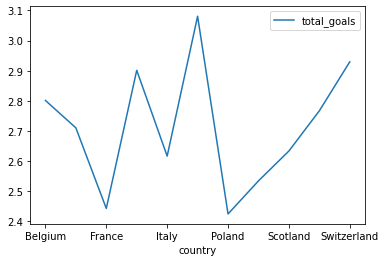

In [15]:
mean_goals.plot()

<AxesSubplot:xlabel='country'>

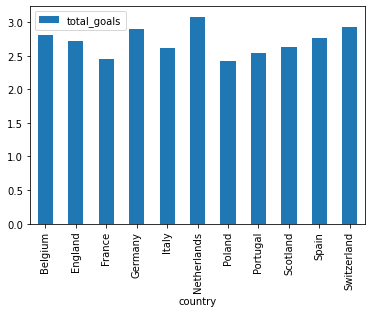

In [17]:
mean_goals.plot(kind='bar')

<AxesSubplot:ylabel='country'>

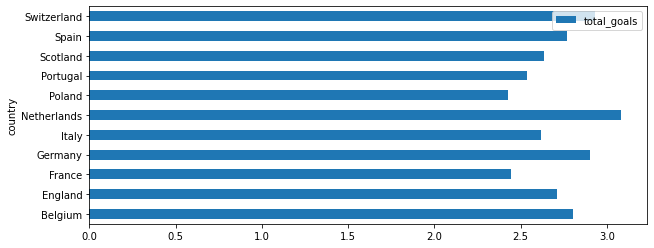

In [22]:
mean_goals.plot(kind='barh', figsize=(10, 4))

<AxesSubplot:ylabel='country'>

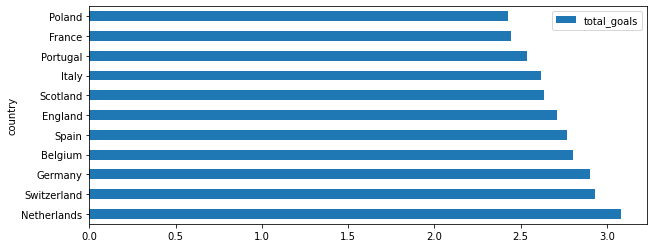

In [24]:
mean_goals.sort_values('total_goals', ascending=False).plot(kind='barh', figsize=(10, 4))

<AxesSubplot:title={'center':'Average number of goals per match (top leagues in Europe)'}, ylabel='country'>

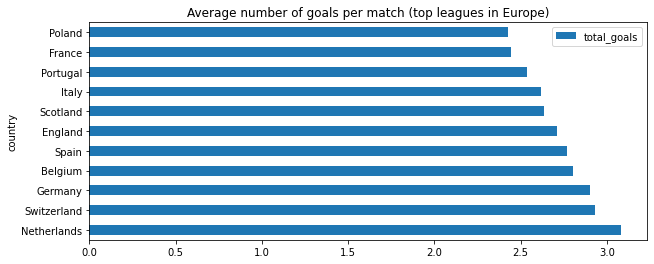

In [25]:
mean_goals.sort_values('total_goals', ascending=False).plot(
    kind='barh', 
    figsize=(10, 4),
    title='Average number of goals per match (top leagues in Europe)'
)